In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
from PIL import Image

TASK 1


In [4]:
data = pd.read_csv("/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-19,225.110001,227.770004,221.059998,226.429993,226.429993,6575100
1,2019-06-20,223.000000,226.899994,216.350006,219.619995,219.619995,11863500
2,2019-06-21,216.220001,222.179993,215.500000,221.860001,221.860001,8202100
3,2019-06-24,223.240005,225.860001,221.020004,223.639999,223.639999,5750800
4,2019-06-25,224.389999,225.339996,219.490005,219.759995,219.759995,6182100


In [5]:
print('Shape of dataset',data.shape)
print('Number of Rows in dataset',data.shape[0])
print('Number of Columns in dataset',data.shape[1])
print('Columns present in dataset',list(data.columns))



Shape of dataset (254, 7)
Number of Rows in dataset 254
Number of Columns in dataset 7
Columns present in dataset ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


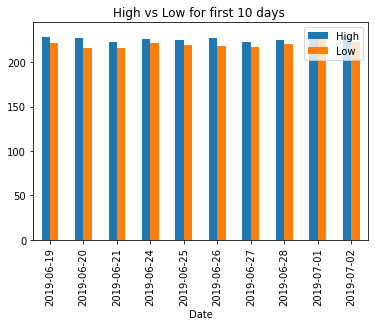

In [6]:
data[["Date", "High", "Low"]][:10].plot(x="Date", kind="bar",title='High vs Low for first 10 days ')

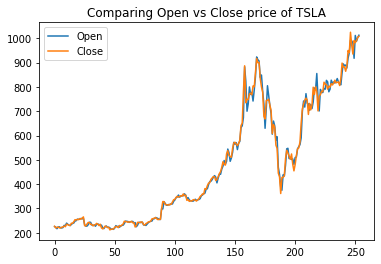

In [7]:
data[['Open','Close']].plot.line(title='Comparing Open vs Close price of TSLA')

In [8]:
matrix1=data.iloc[:6,1:5].values

In [9]:
matrix1

array([[225.110001, 227.770004, 221.059998, 226.429993],
       [223.      , 226.899994, 216.350006, 219.619995],
       [216.220001, 222.179993, 215.5     , 221.860001],
       [223.240005, 225.860001, 221.020004, 223.639999],
       [224.389999, 225.339996, 219.490005, 219.759995],
       [220.309998, 227.229996, 218.100006, 219.270004]])

In [10]:
matrix2=data.iloc[6:11,1:5].values

In [11]:
matrix2

array([[219.449997, 222.899994, 217.350006, 222.839996],
       [220.990005, 225.169998, 220.800003, 223.460007],
       [230.210007, 233.100006, 226.279999, 227.169998],
       [228.889999, 229.149994, 222.220001, 224.550003],
       [239.389999, 241.570007, 234.509995, 234.899994]])

In [12]:
matrixdot = np.dot(matrix1,np.transpose(matrix1))

In [13]:
with h5py.File('matrix.hdf5', 'w') as f:  
    dset = f.create_dataset("data", data = matrixdot) 

In [14]:
with h5py.File('matrix.hdf5', 'r') as f:  
    data = f['data'] 
    print(data[:])

[[202691.75171812 199435.42858815 197153.41057807 201195.17613029
  200118.83888541 199212.65332892]
 [199435.42858815 196252.8745772  193978.01790494 197963.64864044
  196918.96641915 196029.62907185]
 [197153.41057807 193978.01790494 191777.14816564 195697.10880928
  194639.69333003 193769.18150825]
 [201195.17613029 197963.64864044 195697.10880928 199713.531205
  198646.92306571 197746.17985267]
 [200118.83888541 196918.96641915 194639.69333003 198646.92306571
  197599.3031458  196696.91301076]
 [199212.65332892 196029.62907185 193769.18150825 197746.17985267
  196696.91301076 195816.91357228]]


TASK 2


accessing images through matplot lib
jpeg1.jpg


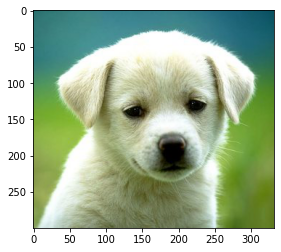

height :  300 width :  332 channels :  3
png1.png


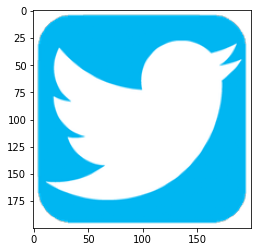

height :  200 width :  200 channels :  4
bmp1.bmp


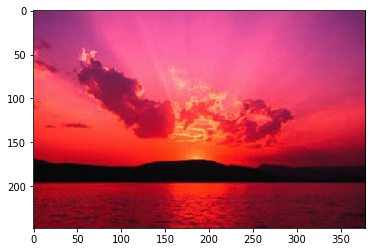

height :  248 width :  379 channels :  4
2.6661102771759033 seconds


In [15]:
print('accessing images through matplot lib')
import time
start_time = time.time()

path_to_folder='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/images/'


for image in os.listdir(path_to_folder):
  imgpath=path_to_folder+image
  print(image)
  
  img=plt.imread(imgpath)
  plt.imshow(img)
  plt.show()
  print('height : ',img.shape[0],'width : ',img.shape[1],'channels : ',img.shape[2])

print((time.time() - start_time),'seconds')

accessing images through PIL


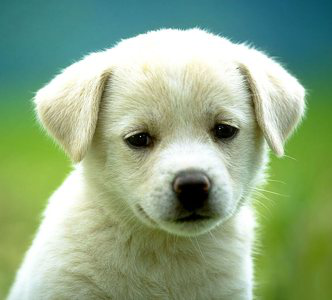

jpeg1.jpg
shape (332, 300)


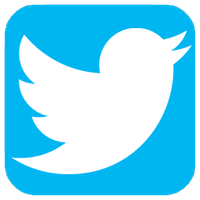

png1.png
shape (200, 200)


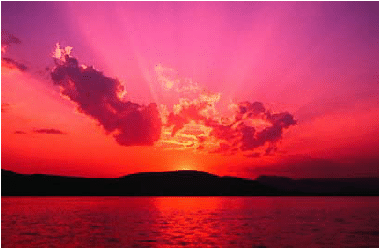

bmp1.bmp
shape (379, 248)
Total Time Taken 0.08957982063293457 seconds


In [16]:
print('accessing images through PIL')
import time

from IPython.display import display
start_time = time.time()

path_to_folder='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/images/'


for image in os.listdir(path_to_folder):
  imgpath=path_to_folder+image
  img=Image.open(imgpath)
  display(img)
  print(image)
  print('shape',img.size)
  
  
  # print('height : ',img.shape[0],'width : ',img.shape[1],'channels : ',img.shape[2])

print('Total Time Taken',(time.time() - start_time),'seconds')

accessing images through opencv
jpeg1.jpg


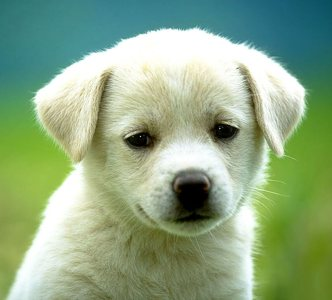

png1.png


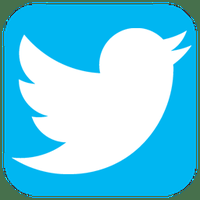

bmp1.bmp


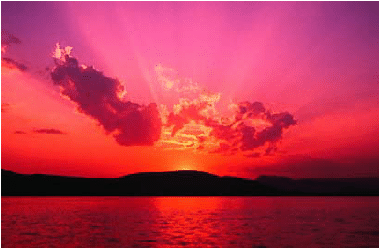

0.1939699649810791 seconds


In [17]:
import cv2
print('accessing images through opencv')
import time
from google.colab.patches import cv2_imshow
from PIL import ImageColor
start_time = time.time()

path_to_folder='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/images/'


for image in os.listdir(path_to_folder):
  imgpath=path_to_folder+image
  print(image)
  img=cv2.imread(imgpath)
  cv2_imshow(img)

  
  # print('height : ',img.shape[0],'width : ',img.shape[1],'channels : ',img.shape[2])

print((time.time() - start_time),'seconds')

convert to greyscale


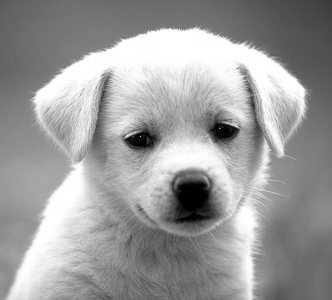

jpeg1.jpg
shape (332, 300)


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


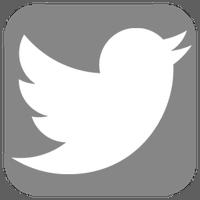

png1.png
shape (200, 200)


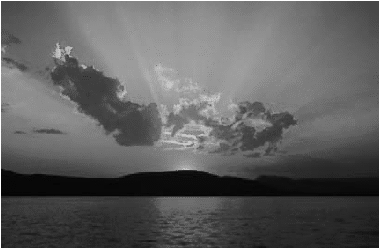

bmp1.bmp
shape (379, 248)
Total Time Taken 0.09419679641723633 seconds


In [18]:
print('convert to greyscale')
import time

from IPython.display import display
start_time = time.time()

path_to_folder='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/images/'


for image in os.listdir(path_to_folder):
  imgpath=path_to_folder+image
  img=Image.open(imgpath).convert('L')
  display(img)
  print(image)
  print('shape',img.size)
  
  
 

print('Total Time Taken',(time.time() - start_time),'seconds')

In [19]:



print('crop image')
from IPython.display import display
start_time = time.time()
path_to_folder='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/images/'

for image in os.listdir(path_to_folder):
  imgpath=path_to_folder+image
  img=Image.open(imgpath)
  width,height=img.size

  im=img.crop((0.5*width,0.5*height,0,0))
  
 

  
  
 

print('Total Time Taken',(time.time() - start_time),'seconds')


crop image
Total Time Taken 0.011875391006469727 seconds


Resize image


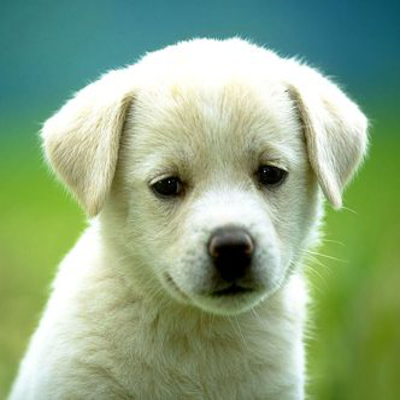

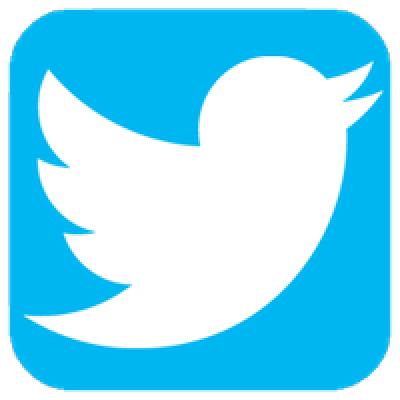

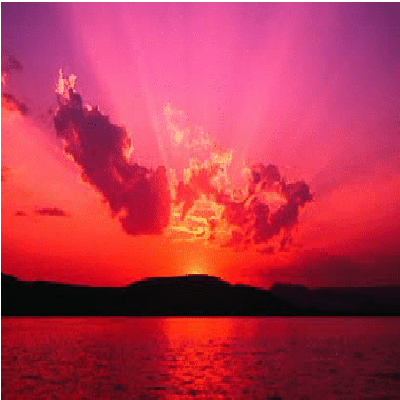

Total Time Taken 0.10925865173339844 seconds


In [20]:
print('Resize image')
from IPython.display import display
start_time = time.time()
path_to_folder='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/images/'

for image in os.listdir(path_to_folder):
  imgpath=path_to_folder+image
  img=Image.open(imgpath)
  width,height=img.size

  im=img.resize((400,400))
  display(im)
 

  
  
 

print('Total Time Taken',(time.time() - start_time),'seconds')

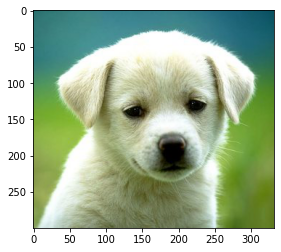

Dimensions of image :
(332, 300)


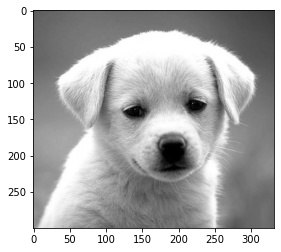

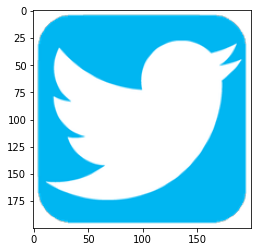

Dimensions of image :
(200, 200)


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


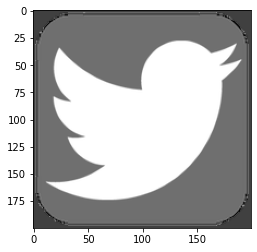

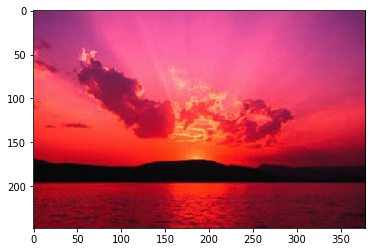

Dimensions of image :
(379, 248)


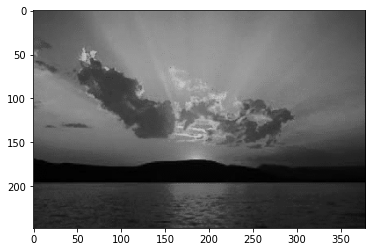

In [21]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt


for image in os.listdir(path_to_folder):
  img1=Image.open(path_to_folder+image)
  array1=np.array(img1)
  plt.imshow(img1)
  plt.show()
  print('Dimensions of image :')
  print(img1.size)

  img1g=ImageOps.grayscale(img1)
  plt.imshow(np.asarray(img1g),cmap='gray')
  plt.show()




#task 5 6 7


In [22]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 1.2MB/s 


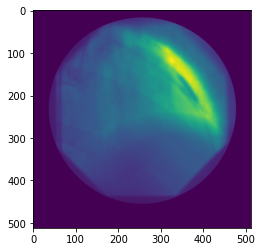

In [23]:
import pydicom
path_to_dcm='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/dicom/0003.DCM'
data9=pydicom.dcmread(path_to_dcm)
img0009=data9.pixel_array

img9_mean=img0009.mean(axis=0)
plt.figure()
plt.imshow(img9_mean)
plt.show()

In [24]:
from IPython.display import HTML
from base64 import b64encode
path_to_video='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/video/VID_7.mp4'
mp4 = open(path_to_video,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


Output hidden; open in https://colab.research.google.com to view.

In [25]:
import cv2
cap = cv2.VideoCapture(path_to_video)
frame_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
print('IMAGE PROPERTIES')
print('Frames in video',frame_len)
print('Frame Width',frame_width)
print('Frame Height',frame_height)
print('FPS',fps)

IMAGE PROPERTIES
Frames in video 147
Frame Width 1920
Frame Height 1080
FPS 30.007961295854003


In [26]:
vidcap = cv2.VideoCapture(path_to_video)
save_path='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/videoframe/'
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite(save_path+"frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  count += 1
print('frames found :',count)

frames found : 147


In [27]:
def generate_video(): 
    image_folder = save_path # make sure to use your folder 
    video_name = 'generatedvideo.avi'  
    images = [img for img in os.listdir(image_folder) 
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")] 
     
    # Array images should only consider 
    # the image files ignoring others if any 
    print(images)  
  
    frame = cv2.imread(os.path.join(image_folder, images[0])) 
  
    # setting the frame width, height width 
    # the width, height of first image 
    height, width, layers = frame.shape   
  
    video = cv2.VideoWriter(video_name, 0, 1, (width, height))  
  
    # Appending the images to the video one by one 
    for image in images:  
        video.write(cv2.imread(os.path.join(image_folder, image)))  
      
    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing the video generated 
  
  
# Calling the generate_video function 
generate_video() 

['frame0.jpg', 'frame17.jpg', 'frame16.jpg', 'frame1.jpg', 'frame18.jpg', 'frame33.jpg', 'frame2.jpg', 'frame35.jpg', 'frame34.jpg', 'frame3.jpg', 'frame19.jpg', 'frame36.jpg', 'frame71.jpg', 'frame56.jpg', 'frame41.jpg', 'frame4.jpg', 'frame20.jpg', 'frame37.jpg', 'frame75.jpg', 'frame72.jpg', 'frame57.jpg', 'frame42.jpg', 'frame21.jpg', 'frame38.jpg', 'frame5.jpg', 'frame76.jpg', 'frame73.jpg', 'frame43.jpg', 'frame58.jpg', 'frame6.jpg', 'frame39.jpg', 'frame22.jpg', 'frame77.jpg', 'frame74.jpg', 'frame44.jpg', 'frame59.jpg', 'frame40.jpg', 'frame78.jpg', 'frame7.jpg', 'frame23.jpg', 'frame45.jpg', 'frame60.jpg', 'frame127.jpg', 'frame97.jpg', 'frame82.jpg', 'frame112.jpg', 'frame142.jpg', 'frame79.jpg', 'frame24.jpg', 'frame8.jpg', 'frame61.jpg', 'frame128.jpg', 'frame98.jpg', 'frame113.jpg', 'frame143.jpg', 'frame25.jpg', 'frame80.jpg', 'frame46.jpg', 'frame9.jpg', 'frame83.jpg', 'frame62.jpg', 'frame129.jpg', 'frame114.jpg', 'frame99.jpg', 'frame47.jpg', 'frame10.jpg', 'frame26.jp

In [28]:
from IPython.display import HTML
from base64 import b64encode
generated_vid='/content/generatedvideo.avi'
avi = open(generated_vid,'rb').read()
data_url = "data:video/avi;base64," + b64encode(avi).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/avi">
</video>
""" % data_url)

In [29]:
!pip install librosa

In [ ]:
import librosa
audio_mp3='/content/drive/My Drive/BTECH SEM 5/ECSE303L-AIandML/Lab 1/sample.mp3'
y,sr=librosa.load(audio_mp3)


# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


Estimated tempo: 161.50 beats per minute


/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))
